<a href="https://www.kaggle.com/code/hajer8/tomato-leaf-disease-sic?scriptVersionId=204523524" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D , Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import normalize
from tensorflow.keras.optimizers import Adam
from keras.applications.densenet import preprocess_input


  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121


from sklearn.metrics import classification_report, confusion_matrix





# Data

In [2]:
# train data
labels = ['Late_blight','healthy','Early_blight','Septoria_leaf_spot','Tomato_Yellow_Leaf_Curl_Virus','Bacterial_spot','Target_Spot','Tomato_mosaic_virus','Leaf_Mold','Spider_mites Two-spotted_spider_mite','powdery_mildew']

train_path = r'/kaggle/input/tomato-disease-multiple-sources/train'
train_data = []
for i in labels:
    label_path_train = os.path.join(train_path , i)
    clas = labels.index(i)
    
    for img in os.listdir(label_path_train):
        new_img = cv2.imread(os.path.join(label_path_train, img))
        new_img = cv2.resize(new_img, (256,256))
        train_data.append([new_img , clas])
        

In [3]:
# split to features & label 

random.shuffle(train_data)    
x_train =[]
y_train = []
for feature ,label in train_data:
  x_train.append(feature)
  y_train.append(label)  
x_train = np.array(x_train)
y_train = np.array(y_train)

In [4]:
# test data
test_path = r'/kaggle/input/tomato-disease-multiple-sources/valid'
test_data = []
for i in labels:
    label_path_test = os.path.join(test_path , i)
    clas = labels.index(i)
    
    for img in os.listdir(label_path_test):
        try:
           new_img = cv2.imread(os.path.join(label_path_test, img))
           new_img = cv2.resize(new_img , (256,256))
           test_data.append([new_img , clas])
            
        except:
            print('photo not found')

libpng error: Read Error


photo not found


In [5]:
# split to features & label 

random.shuffle(test_data)    
x_test =[]
y_test = []
for feature ,label in test_data:
  x_test.append(feature)
  y_test.append(label)  
x_test = np.array(x_test)
y_test = np.array(y_test)

# EDA

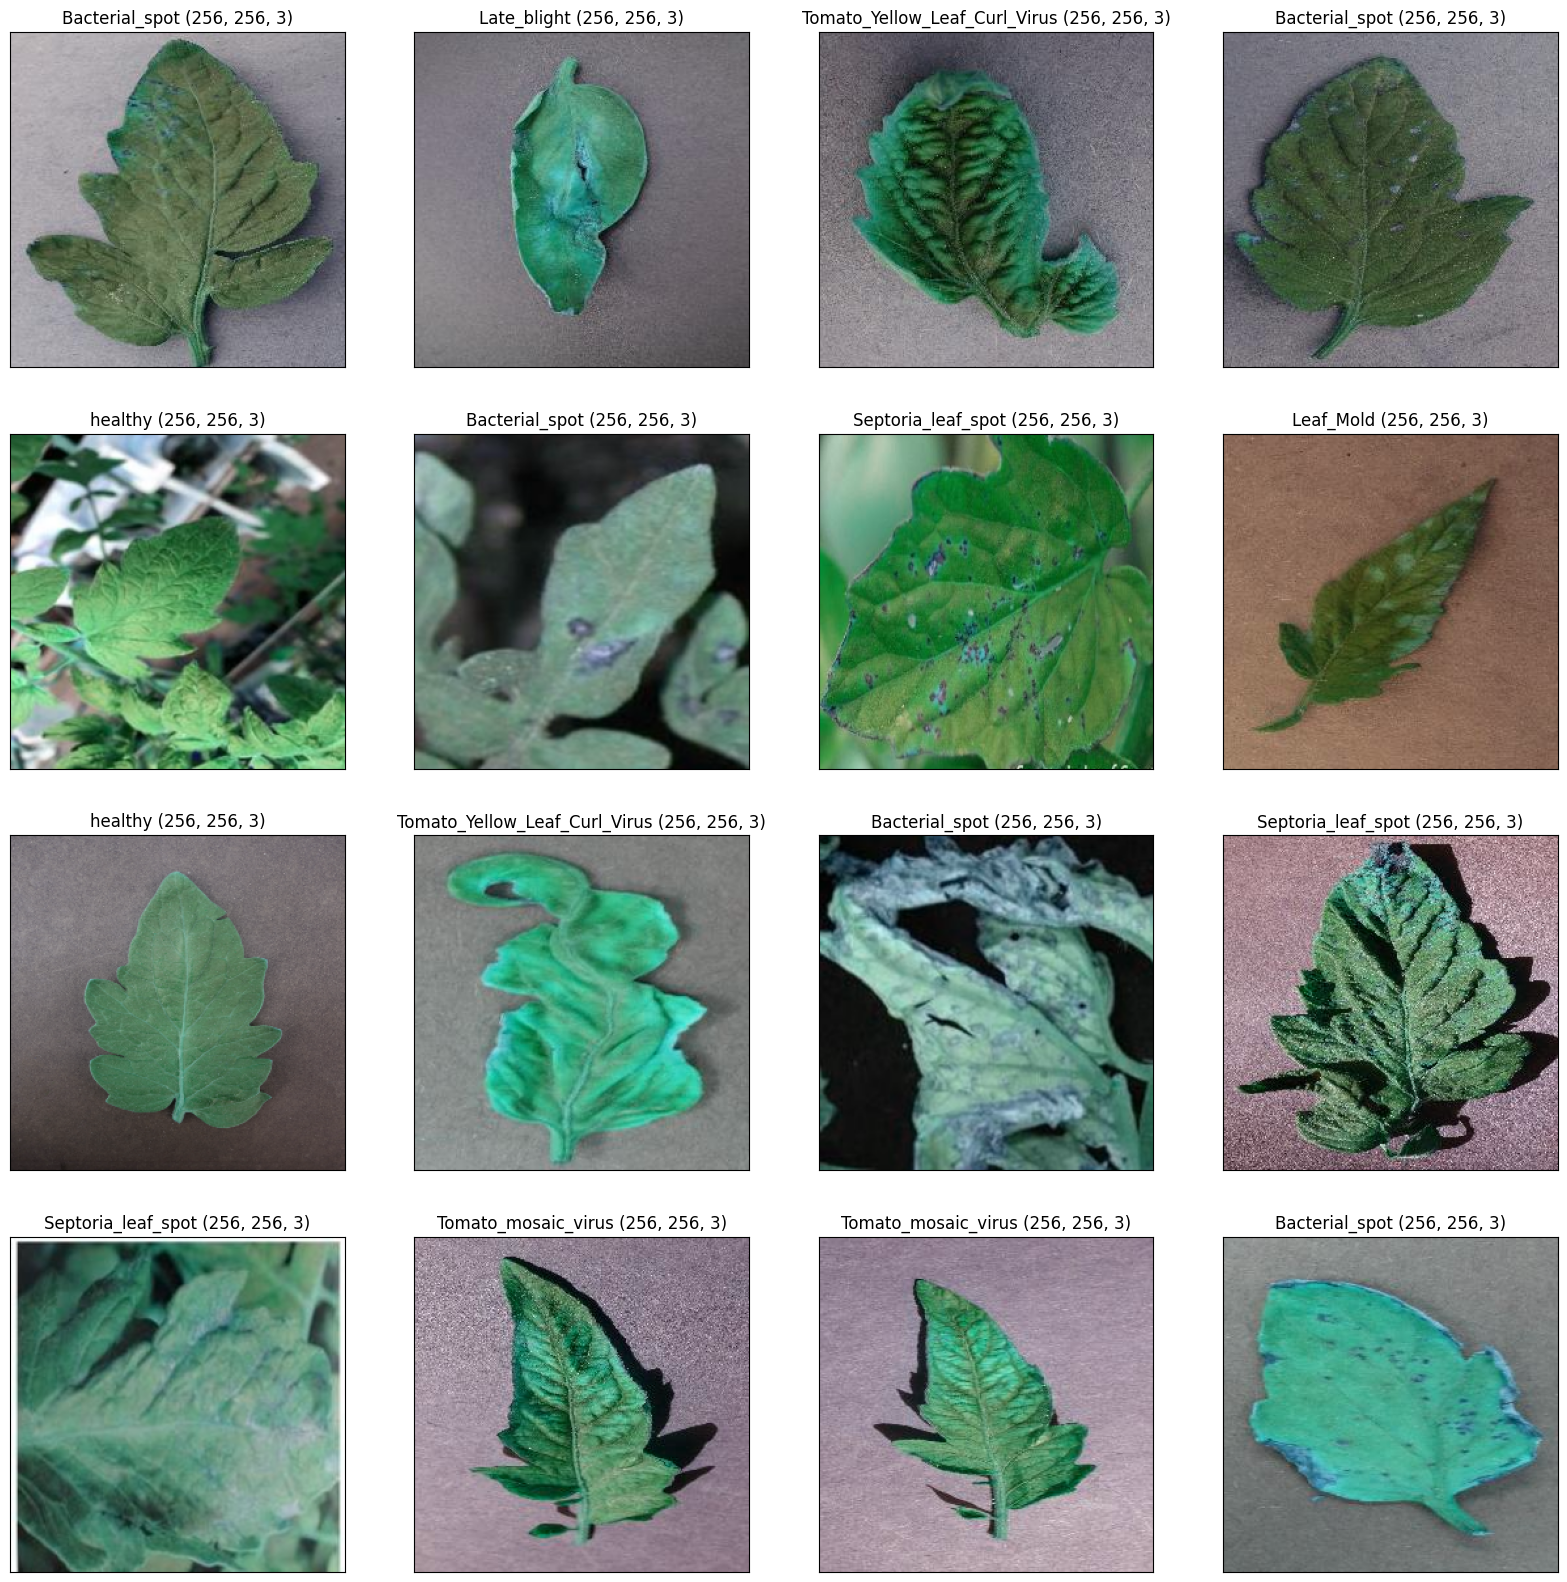

In [7]:
# show sample from data
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_data[i][0])
    plt.title(f"{labels[y_train[i]]} {train_data[i][0].shape}")
    plt.xticks([])
    plt.yticks([])
    
    
plt.show()

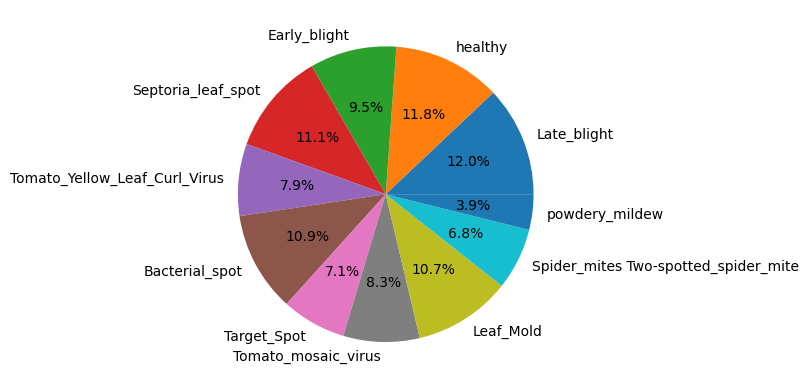

In [8]:
# pie
plt.pie([(len(y_train[y_train == 0])) , (len(y_train[y_train == 1])) ,(len(y_train[y_train == 2])),(len(y_train[y_train == 3])),(len(y_train[y_train == 4])),(len(y_train[y_train == 5])),(len(y_train[y_train == 6])),(len(y_train[y_train == 7])),(len(y_train[y_train == 8])),(len(y_train[y_train == 9])),(len(y_train[y_train == 10]))],labels = labels , autopct="%1.1f%%",
                                       )
plt.show()

In [15]:
print(len(y_train))
print(len(y_test))

25851
6683


# Data augmantaion

In [6]:
train_generator = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,  
    vertical_flip=True,
     validation_split=0.2,
    preprocessing_function=preprocess_input
    
)

test_generator = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,  
    vertical_flip=True
)

In [7]:
train_data = train_generator.flow_from_directory(
    '/kaggle/input/tomato-disease-multiple-sources/train',
    target_size=(256, 256),
    batch_size=120,
    class_mode='categorical',
    subset='training',  # Set as training data
    seed=42 , # For reproducibility
    shuffle = True
)

Found 20686 images belonging to 11 classes.


In [8]:
val_data = train_generator.flow_from_directory(
    '/kaggle/input/tomato-disease-multiple-sources/train',
    target_size=(256, 256),
    batch_size=120,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    seed=42  # For reproducibility
)

Found 5165 images belonging to 11 classes.


In [9]:
test_data = test_generator.flow_from_directory(
    '/kaggle/input/tomato-disease-multiple-sources/valid',  # Adjust to your test data path
    target_size=(256, 256),
    batch_size=120,
    class_mode='categorical',
    shuffle=False  # Don't shuffle the test data
)

Found 6684 images belonging to 11 classes.


# Model

LeNet

In [13]:
x_train.shape

(25851, 256, 256, 3)

In [14]:
x_train1 = np.expand_dims(x_train, axis=-1)
x_val1 = np.expand_dims(x_val, axis=-1)
print(x_train1.shape)
print(x_val1.shape)

(25851, 256, 256, 3, 1)
(6683, 256, 256, 3, 1)


In [58]:
model_1 = Sequential()

In [59]:
model_1.add(Conv2D(filters = 40 , kernel_size = (3,3) , input_shape = (256,256,3) ,activation = 'relu'))
model_1.add(MaxPool2D(pool_size = (2,2)))

model_1.add(Conv2D(60, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size = (2,2)))

model_1.add(Conv2D(80, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size = (2,2)))

model_1.add(Conv2D(100, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size = (2,2)))


#model_1.add(Conv2D(10, (5, 5), activation='relu'))

model_1.add(Flatten())

model_1.add(Dense(100 , activation = 'relu'))
model_1.add(Dense(120 , activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(150 , activation = 'relu'))
model_1.add(Dense(200 , activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(200 , activation = 'relu'))
model_1.add(Dense(120 , activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(100 , activation = 'relu'))
model_1.add(Dense(11 , activation = 'softmax'))

In [60]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model_1.fit(datagen.flow(x_train1, y_train, batch_size=70),
            epochs=100,
            validation_data = (x_val1 , y_val),
            #callbacks=[early_stopping]
           )

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 61s 154ms/step - accuracy: 0.1294 - loss: 2.3773 - val_accuracy: 0.1869 - val_loss: 2.1116
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 81s 152ms/step - accuracy: 0.2433 - loss: 2.0677 - val_accuracy: 0.1867 - val_loss: 2.8204
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 152ms/step - accuracy: 0.3305 - loss: 1.8502 - val_accuracy: 0.3675 - val_loss: 1.7473
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step - accuracy: 0.3994 - loss: 1.6893 - val_accuracy: 0.4058 - val_loss: 1.7481
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 82s 151ms/step - accuracy: 0.4433 - loss: 1.5892 - val_accuracy: 0.4371 - val_loss: 1.6679
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 151ms/step - accuracy: 0.4894 - loss: 1.4728 - val_accuracy: 0.3852 - val_loss: 1.9435
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.5097 - loss: 1.4037 - val_accuracy: 0.4184 - val_loss: 1.7895
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 152ms/step - accuracy: 0.5287 -

In [45]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 48, 48, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 24, 24, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 22, 22, 40)     │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 11, 11, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 9, 9, 60)       │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 2, 2, 80)       │        43,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 1, 1, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 120)            │        12,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 150)            │        18,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 200)            │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 11)             │         1,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,445 (2.50 MB)

 Trainable params: 218,481 (853.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,964 (1.67 MB)

<Axes: >

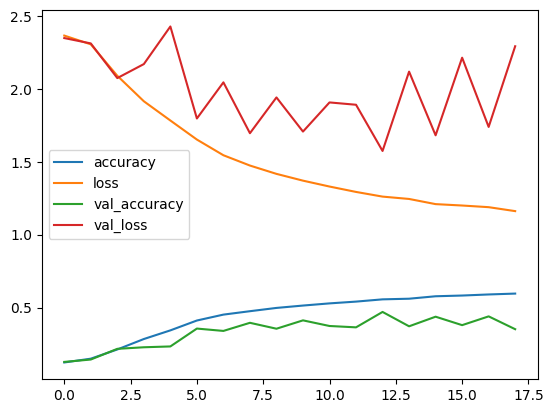

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
Results_1=pd.DataFrame(model_1.history.history)
Results_1.plot()

In [47]:
predictions=model_1.predict(x_val)
predictions

209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


array([[2.9719757e-02, 1.6733106e-04, 9.2387056e-01, ..., 1.6312666e-02,
        1.5105730e-06, 2.3295054e-07],
       [7.7052154e-03, 4.5930301e-05, 5.0185122e-02, ..., 8.5198479e-03,
        1.1911415e-02, 1.9776479e-04],
       [6.7769861e-01, 5.8704149e-03, 9.7935051e-03, ..., 3.8938053e-02,
        1.4684619e-05, 2.3731083e-02],
       ...,
       [1.7123066e-01, 5.3012352e-03, 4.0077543e-01, ..., 2.5378025e-01,
        1.1841815e-03, 3.1760670e-04],
       [1.6286090e-02, 2.3578617e-04, 2.0592637e-01, ..., 1.6267024e-02,
        9.1350842e-03, 1.6315269e-03],
       [2.0331000e-03, 1.1021369e-03, 4.6187080e-03, ..., 8.8470295e-04,
        7.9169607e-01, 1.2108927e-07]], dtype=float32)

In [48]:
import numpy as np
pred = []
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))
z= np.array(pred)

In [49]:
prediction = pd.DataFrame(z ,columns =['Y_pred' ])
prediction ['Y_test'] = y_val

In [50]:
prediction

,Y_pred,Y_test
0,2,3
1,4,4
2,0,0
3,3,5
4,7,7
...,...,...
6678,3,1
6679,2,0
6680,2,1
6681,5,5


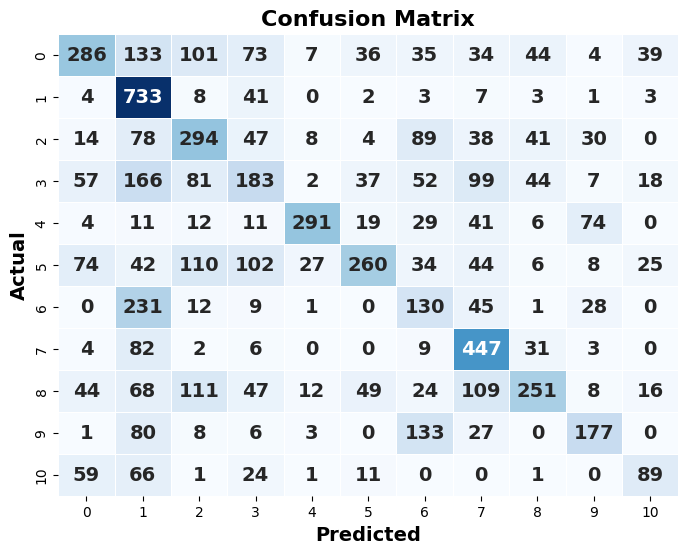

In [52]:
# confusion matrix
import seaborn as sns
confusion = confusion_matrix(y_val, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [53]:
# classification report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.52      0.36      0.43       792
           1       0.43      0.91      0.59       805
           2       0.40      0.46      0.43       643
           3       0.33      0.25      0.28       746
           4       0.83      0.58      0.68       498
           5       0.62      0.36      0.45       732
           6       0.24      0.28      0.26       457
           7       0.50      0.77      0.61       584
           8       0.59      0.34      0.43       739
           9       0.52      0.41      0.46       435
          10       0.47      0.35      0.40       252

    accuracy                           0.47      6683
   macro avg       0.50      0.46      0.46      6683
weighted avg       0.50      0.47      0.46      6683



# Transformers

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)
for layer in base_model.layers:
    layer.trainable = False

/tmp/ipykernel_30/4088479171.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [12]:
model_2 = Sequential()
model_2.add(base_model)
model_2.add(BatchNormalization())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.35))
model_2.add(BatchNormalization())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(150, activation='relu'))
model_2.add(Dense(180, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(11, activation='softmax'))

In [13]:

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model_2.fit(train_data, epochs=20,
                    validation_data= val_data
                    
                   )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 1092s 6s/step - accuracy: 0.4161 - loss: 1.6317 - val_accuracy: 0.8041 - val_loss: 0.5995
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1085s 6s/step - accuracy: 0.7351 - loss: 0.7800 - val_accuracy: 0.8281 - val_loss: 0.5004
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1048s 6s/step - accuracy: 0.7734 - loss: 0.6542 - val_accuracy: 0.8438 - val_loss: 0.4679
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1102s 6s/step - accuracy: 0.8030 - loss: 0.5724 - val_accuracy: 0.8711 - val_loss: 0.3833
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1103s 6s/step - accuracy: 0.8112 - loss: 0.5413 - val_accuracy: 0.8714 - val_loss: 0.3839
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1045s 6s/step - accuracy: 0.8270 - loss: 0.5101 - val_accuracy: 0.8747 - val_loss: 0.3777
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1044s 6s/step - accuracy: 0.8418 - loss: 0.4721 - val_accuracy: 0.8683 - val_loss: 0.3797
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1050s 6s/step - accuracy: 0.8460 - loss: 0.4551 - val_accurac

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = test_data.classes

# Get the class labels (if needed)
class_labels = list(test_data.class_indices.keys())

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))